In [108]:
import matplotlib.pyplot as plt
import numpy as np

# PDFs

In [109]:
def f(x):
    return 1-x**2

La función $f$ integra 1?

In [115]:
# A mano
n = 10_000
x = np.linspace(-1,1,n)
dx = 2/len(x)
sum(f(x)*dx)


1.3331999866653288

In [116]:
# Otra forma
n = 10_000
x = np.linspace(-1,1,n)
np.trapz(f(x), x)

1.333333319997333

In [118]:
from scipy.integrate import quad
quad(f,-1,1) # Acá no hace falta definir x!

(1.3333333333333335, 1.4802973661668755e-14)

Ploteo de una función

In [82]:
# Esta función sí define una pdf!
def f(x):
    return (1-x**2) / (4/3)
quad(f,-1,1)

(1.0, 1.1102230246251565e-14)

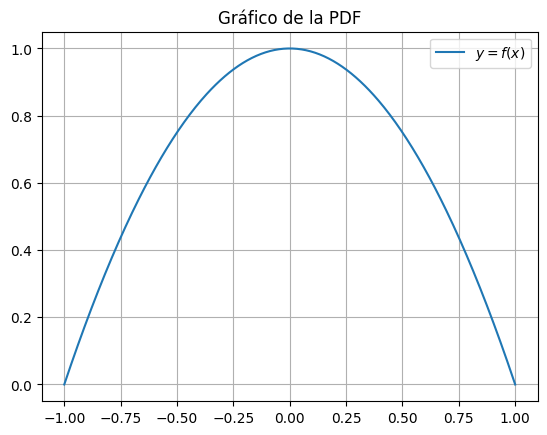

In [122]:
# Generate x and y values for plotting
x = np.linspace(-1, 1, 400) 
y = f(x)

# Plot the function
plt.plot(x, y, label=r'$y = f(x)$')
plt.title('Gráfico de la PDF')

plt.legend()
plt.grid(True)
plt.show()

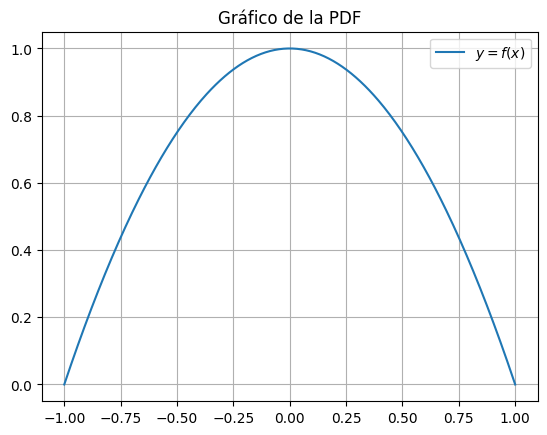

In [124]:
# Generate x and y values for plotting
xmin = -1
xmax = 1
x = np.linspace(xmin, xmax, 400) 
y = f(x)

# Plot the function
fig, ax = plt.subplots()

ax.plot(x, y, label=r'$y = f(x)$')

ax.set_title('Gráfico de la PDF')
ax.legend()
ax.grid(True)
plt.show()

In [127]:
def plot_pdf(f,xmin,xmax,samples = 400):
    x = np.linspace(xmin, xmax, samples) 
    y = f(x)

    # Plot the function
    fig, ax = plt.subplots()

    ax.plot(x, y)

    ax.set_title('Gráfico de la PDF')
    ax.grid(True)
    plt.show()
    return fig


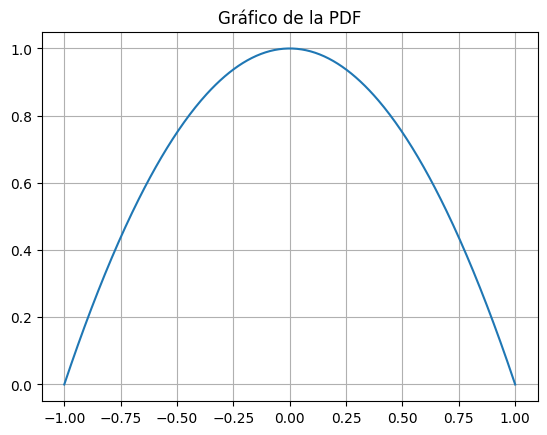

In [128]:
fig = plot_pdf(f,-1,1)

# Normal distribution

In [129]:
import scipy.stats as stats

In [130]:
normal = stats.norm

In [131]:
normal

In [90]:
print(normal.cdf(0))
print(normal.pdf(0))

0.5
0.3989422804014327


In [91]:
print(normal.cdf(1))
print(normal.cdf(1) - normal.cdf(-1))
print(normal.cdf(2) - normal.cdf(-2))


0.8413447460685429
0.6826894921370859
0.9544997361036416


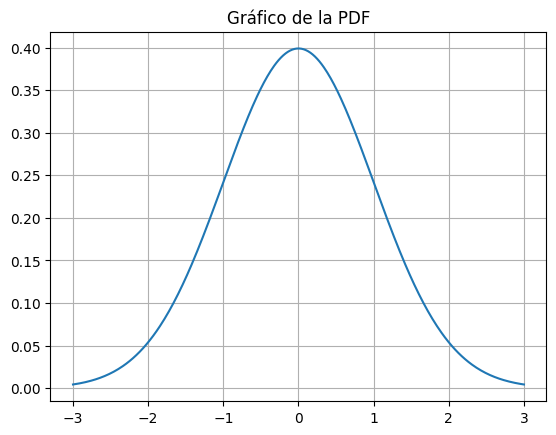

In [132]:
fig = plot_pdf(normal.pdf,-3,3)

In [134]:
# Solución del problema:
normal.cdf(.5)+normal.cdf(.1)-1 # inciso i


0.2312902985510421

In [142]:
# Inversa de la cdf:
10*normal.ppf(.05) +2 # inciso ii.a
10*normal.ppf(.95) +2 

18.448536269514722

# Gráfico de distribución que viene dada por scipy

In [143]:
def plot_pdf_scipy(dist, dist_name):
    """
    Plot PDF and CDF of a distribution already defined in scipy.
    """
    x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 1000)
    pdf = dist.pdf(x)
    median = dist.median()
    mean = dist.mean()
    

    fig, ax = plt.subplots()

    ax.plot(x, pdf, color="k", label='PDF')
    
    ax.axvline(median, color='r', linestyle='--', label=f'median: {median:.2f}')
    ax.axvline(mean, color='m', linestyle='--', label=f'Mean: {mean:.2f}')
    
    ax.grid(True)
    plt.title(f'Gráfico de la PDF de {dist_name}')
    plt.legend()
    plt.show()

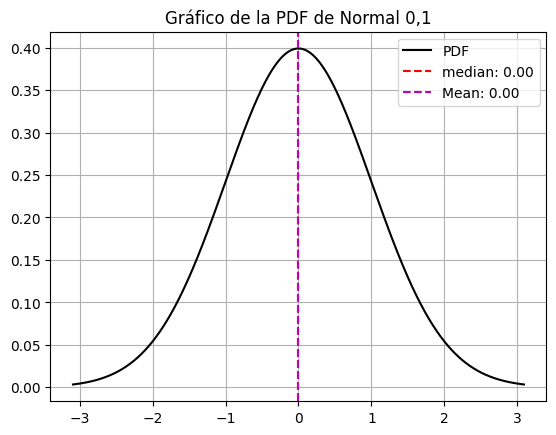

In [144]:
plot_pdf_scipy(normal, "Normal 0,1")

In [157]:
normal.cdf(-1)
normal.ppf(.158)
# El percentil 15,% de la normal está en -1

-1.0027116650265493

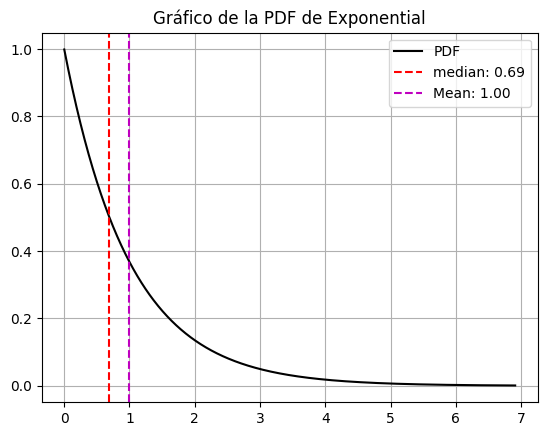

In [70]:
from scipy.stats import expon
plot_pdf_scipy(expon, "Exponential")

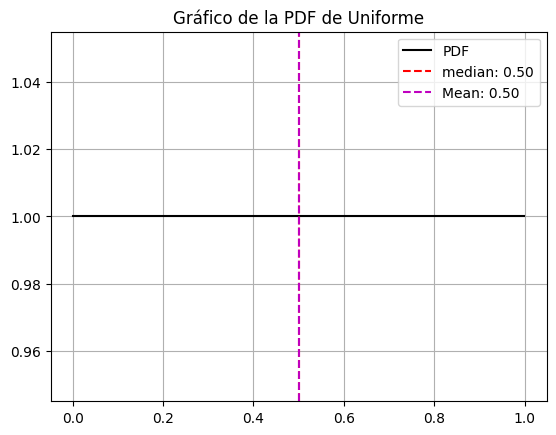

In [71]:
from scipy.stats import uniform
plot_pdf_scipy(uniform, "Uniforme")

# Gráfico de distribución que viene dada por un vector

In [178]:
v = expon.rvs(size=1_000)

In [179]:
np.mean(v) # media de v
np.median(v) # mediana 
np.percentile(v,10) # percentil
np.std(v)

1.015334066466911

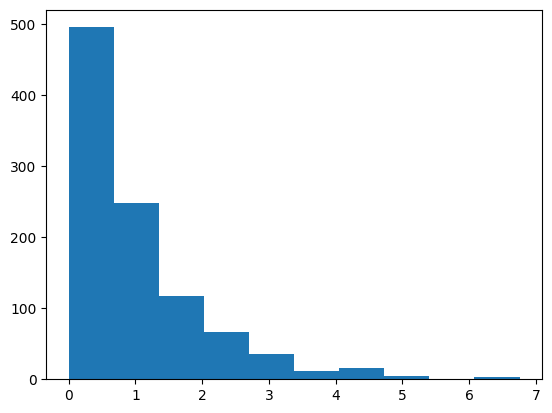

In [180]:
plt.hist(v,bins = 10)
plt.show()